In [2]:
import numpy as np , pandas as pd

In [4]:
location_to_state = {
    'L1': 0,
    'L2':1,
    'L3':2,
    'L4':3,
    'L5':4,
    'L6':5,
    'L7':6,
    'L8':7,
    'L9':8,
}

In [6]:
actions = [0,1,2,3,4,5,6,7,8]

In [8]:
rewards = np.array([[0,1,0,0,0,0,0,0,0],
                    [1,0,1,0,1,0,0,0,0],
                    [0,1,0,0,0,1,0,0,0],
                    [0,0,0,0,0,0,1,0,0],
                    [0,1,0,0,0,0,0,1,0],
                    [0,0,1,0,0,0,0,0,0],
                    [0,0,0,1,0,0,0,1,0],
                    [0,0,0,0,1,0,1,0,1],
                    [0,0,0,0,0,0,0,1,0,]])

In [10]:
state_to_location = dict((state , location) for location,state in location_to_state.items())

gamma = 0.75
alpha = 0.9 # learning rate
state_to_location

{0: 'L1',
 1: 'L2',
 2: 'L3',
 3: 'L4',
 4: 'L5',
 5: 'L6',
 6: 'L7',
 7: 'L8',
 8: 'L9'}

In [12]:
class QAgent():
    def __init__(self , alpha , gamma , location_to_state , actions, rewards , state_to_location):
        self.gamma = gamma
        self.alpha = alpha
        
        self.location_to_state = location_to_state
        self.actions = actions
        self.rewards = rewards
        self.state_to_location = state_to_location
        
        M = len(location_to_state)
        self.Q = np.zeros((M,M), dtype = None , order = 'C')
        
    def training(self , start_location , end_location , iterations):
        
        rewards_new = np.copy(self.rewards)
        
        ending_state = self.location_to_state[end_location]
        rewards_new[ending_state, ending_state] = 999
        
        #picking a randome current state
        for i in range(iterations):
            current_state = np.random.randint(0,9)
            playable_actions = []
            
            #iterate through the reward matrix to get the states
            #directly reachable frome the randomly chosen current state
            #assign those state in a list named playable_actions.
            for j in range(9):
                if rewards_new[current_state,j] > 0 :
                    playable_actions.append(j)
                    
                    
            #choosing a random next state
            next_state = np.random.choice(playable_actions)
            
            #finding temporal difference
            TD = rewards_new[current_state, next_state] +  self.gamma * self.Q[next_state, np.argmax(self.Q[next_state,])] - self.Q[current_state , next_state]
            
            self.Q[current_state , next_state] += self.alpha * TD
            
        route = [start_location]
        next_location = start_location
        
        # Get the roate
        self.get_optimal_route(start_location , end_location , next_location , route , self.Q)
        
    # Get the optimal route
    def get_optimal_route(self , start_location , end_location , next_location , route , Q):
        
        while (next_location != end_location):
            starting_state = self.location_to_state[start_location]
            next_state = np.argmax(Q[starting_state,])
            next_location = self.state_to_location[next_state]
            route.append(next_location)
            start_location = next_location
            
        print(route)

In [18]:
qagent = QAgent(alpha , gamma , location_to_state , actions , rewards , state_to_location)
qagent.training('L2' , 'L8' , 1000)

['L2', 'L5', 'L8']


# second project Q_learning

In [25]:
import numpy as np
import gym
import random
import imageio
from tqdm.notebook import trange

In [27]:
env = gym.make("FrozenLake-v1",map_name="4x4",is_slippery=False)

print("Observation Space", env.observation_space)
print("Sample observation", env.observation_space.sample()) # display a random observation

Observation Space Discrete(16)
Sample observation 1


In [29]:
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample())

Action Space Shape 4
Action Space Sample 1


In [31]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")

action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [33]:
def initialize_q_table(state_space, action_space):
    Qtable = np.zeros((state_space, action_space))
    return Qtable

Qtable_frozenlake = initialize_q_table(state_space, action_space)

In [35]:
def epsilon_greedy_policy(Qtable, state, epsilon):
    random_int = random.uniform(0,1)
    if random_int > epsilon:
        action = np.argmax(Qtable[state])
    else:
        action = env.action_space.sample()
    return action

In [37]:
def greedy_policy(Qtable, state):
    action = np.argmax(Qtable[state])
    return action

In [39]:
# Training parameters
n_training_episodes = 10000
learning_rate = 0.7        

# Evaluation parameters
n_eval_episodes = 100      

# Environment parameters
env_id = "FrozenLake-v1"   
max_steps = 99             
gamma = 0.95               
eval_seed = []             

# Exploration parameters
max_epsilon = 1.0           
min_epsilon = 0.05           
decay_rate = 0.0005           

In [41]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in trange(n_training_episodes):
 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state = env.reset()
    step = 0
    done = False

    # repeat
    for step in range(max_steps):
   
      action = epsilon_greedy_policy(Qtable, state, epsilon)

   
      new_state, reward, done, info = env.step(action)

   
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If done, finish the episode
      if done:
        break
     
      # Our state is the new state
      state = new_state
  return Qtable

In [43]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)

  0%|          | 0/10000 [00:00<?, ?it/s]

ValueError: too many values to unpack (expected 4)

In [245]:
Qtable_frozenlake

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [248]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):

  episode_rewards = []
  for episode in range(n_eval_episodes):
    if seed:
      state = env.reset(seed=seed[episode])
    else:
      state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
   
    for step in range(max_steps):
      # Take the action (index) that have the maximum reward
      action = np.argmax(Q[state][:])
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward
       
      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [250]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

Mean_reward=1.00 +/- 0.00


## visualize

In [259]:
def record_video(env, Qtable, out_directory, fps=1):
  images = [] 
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(Qtable[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

In [265]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, Qtable_frozenlake, video_path, video_fps)

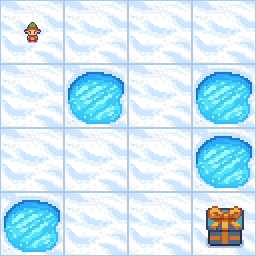

In [267]:
from IPython.display import Image
Image('/content/replay.gif')